In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,8)

def ForestPlot(data,errors,labels,xlabel=''):
    data = np.flip(np.array(data),0)
    errors = np.flip(np.array(errors),0)
    mean = np.average(data,weights=np.power(1./errors,2.))
    meanErr = np.sqrt((1./np.sum(np.power(1./errors,2.))))
    labels.append(r'$\bf{Combined}$')
    labels = np.flip(np.array(labels),0)
    datastrings = [r'%.3g $\pm$ %.3g' %(x,w) for x,w in zip(data,errors)]
    datastrings.insert(0,r'$\bf{%.3g \pm %.3g}$' %(mean,meanErr))
    index = np.linspace(2,len(data)+1,len(data))
    fig, ax1 = plt.subplots(figsize=figsize)
    plt.axvline(mean,ls='--',color='gray',label='Weighted mean: %f' %(mean))
    plt.errorbar(data,index,xerr=errors,color='C0',ls='',marker='o',markersize=8,elinewidth=2,capsize=10,markeredgewidth=2)
    plt.errorbar([mean],[1],xerr=[meanErr],color='C3',ls='',marker='o',markersize=8,elinewidth=2,capsize=10,markeredgewidth=2)
    plt.ylim(0.5,index[-1]+0.5)
    index = np.linspace(1,len(data)+1,len(data)+1)
    plt.yticks(index, labels)
    plt.xlabel(xlabel)
    ax2 = ax1.twinx()
    plt.ylim(0.5,index[-1]+0.5)
    plt.yticks(index, datastrings)
    fig.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.show()

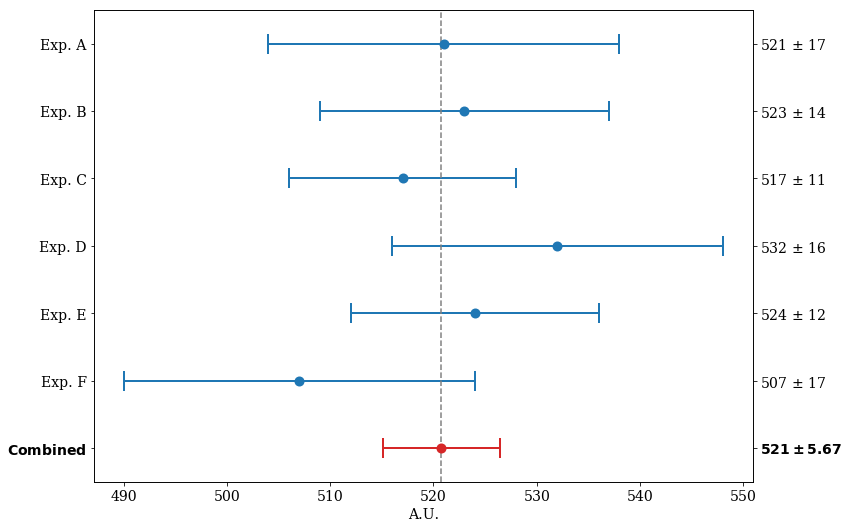

In [2]:
data = [521,523,517,532,524,507]
errors = [17,14,11,16,12,17]
labels = ['Exp. A','Exp. B','Exp. C','Exp. D','Exp. E','Exp. F']

ForestPlot(data,errors,labels,xlabel='A.U.')